# Seismic signal processing

## Filtering

Note: Run the "[Download seismic data](../seismic_waveform)" section first to download the **waveforms.mseed** file

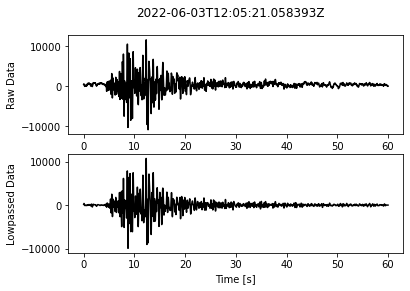

In [10]:
import numpy as np
import matplotlib.pyplot as plt

import obspy


# Read the seismogram
st = obspy.read("waveforms.mseed")

# There is only one trace in the Stream object, let's work on that trace...
tr = st[0]

# Filtering with a lowpass on a copy of the original Trace
tr_filt = tr.copy()
tr_filt.filter('bandpass', freqmin=1.0, freqmax=5, corners=4, zerophase=True)

# Now let's plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
plt.subplot(211)
plt.plot(t, tr.data, 'k')
plt.ylabel('Raw Data')
plt.subplot(212)
plt.plot(t, tr_filt.data, 'k')
plt.ylabel('Lowpassed Data')
plt.xlabel('Time [s]')
plt.suptitle(tr.stats.starttime)
plt.show()